In [1]:
!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
!unzip -o dogImages.zip
!unzip -o lfw.zip

!mv dogImages dog_images

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0004.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/._Steffi_Graf  
   creating: lfw/Stella_Keitel/
  inflating: lfw/Stella_Keitel/Stella_Keitel_0001.jpg  
   creating: __MACOSX/lfw/Stella_Keitel/
  inflating: __MACOSX/lfw/Stella_Keitel/._Stella_Keitel_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_Keitel  
   creating: lfw/Stella_McCartney/
  inflating: lfw/Stella_McCartney/Stella_McCartney_0001.jpg  
   creating: __MACOSX/lfw/Stella_McCartney/
  inflating: __MACOSX/lfw/Stella_McCartney/._Stella_McCartney_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_McCartney  
   creating: lfw/Stella_Tennant/
  inflating: lfw/S

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transforms = transforms.Compose([transforms.Resize(size=258),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder('dog_images/train', transform=train_transforms)
valid_data = datasets.ImageFolder('dog_images/valid', transform=valid_transforms)
test_data = datasets.ImageFolder('dog_images/test', transform=valid_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)

validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)

loaders_scratch = {'train' : trainloader, 'valid' : validloader, 'test' : testloader}

In [34]:
def find_classes(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

def class_names(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_names_dict = {i : classes[i] for i in range(len(classes))}
    return class_names_dict

class_names_dict = class_names('dog_images/train')
print(class_names_dict)

{0: '001.Affenpinscher', 1: '002.Afghan_hound', 2: '003.Airedale_terrier', 3: '004.Akita', 4: '005.Alaskan_malamute', 5: '006.American_eskimo_dog', 6: '007.American_foxhound', 7: '008.American_staffordshire_terrier', 8: '009.American_water_spaniel', 9: '010.Anatolian_shepherd_dog', 10: '011.Australian_cattle_dog', 11: '012.Australian_shepherd', 12: '013.Australian_terrier', 13: '014.Basenji', 14: '015.Basset_hound', 15: '016.Beagle', 16: '017.Bearded_collie', 17: '018.Beauceron', 18: '019.Bedlington_terrier', 19: '020.Belgian_malinois', 20: '021.Belgian_sheepdog', 21: '022.Belgian_tervuren', 22: '023.Bernese_mountain_dog', 23: '024.Bichon_frise', 24: '025.Black_and_tan_coonhound', 25: '026.Black_russian_terrier', 26: '027.Bloodhound', 27: '028.Bluetick_coonhound', 28: '029.Border_collie', 29: '030.Border_terrier', 30: '031.Borzoi', 31: '032.Boston_terrier', 32: '033.Bouvier_des_flandres', 33: '034.Boxer', 34: '035.Boykin_spaniel', 35: '036.Briard', 36: '037.Brittany', 37: '038.Brussels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


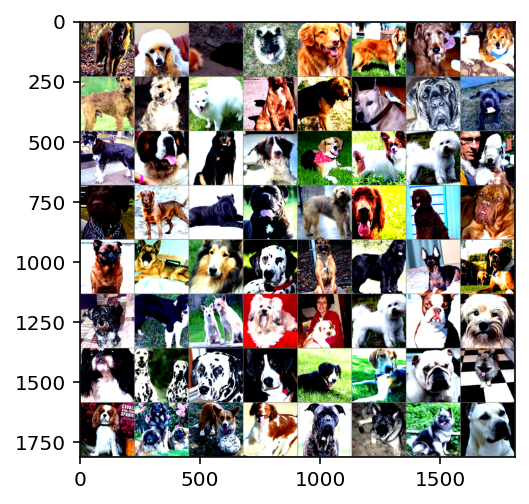

098.Leonberger 124.Poodle 091.Japanese_chin 092.Keeshond 112.Nova_scotia_duck_tolling_retriever 054.Collie 087.Irish_terrier 084.Icelandic_sheepdog 087.Irish_terrier 042.Cairn_terrier
torch.Size([3, 224, 224])


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % class_names_dict[int(labels[j])] for j in range(10)))
print(images[0].size())

In [36]:
import torch.nn as nn
import torch.nn.functional as F


# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 54 * 54, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 133)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        #print(' '.join(str(x.size())))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.size())
        x = x.view(-1, 16 * 54 * 54)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print (model_scratch)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=133, bias=True)
)


In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.003)

In [0]:
import numpy as np
import time



def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    
    valid_loss_min = np.Inf 
    initial_time = time.time()
    train_losses, valid_losses = [], []
    
    for epoch in range(1, n_epochs+1):

        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        initial_epoch_time = time.time()
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            log_ps = model(data)
            loss = criterion(log_ps, target)
            loss.backward()
            optimizer.step()
        
            #running_loss += train_loss.item()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #A
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss

                ps_log = model(data)
                loss = criterion(ps_log, target)
                valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)



        final_epoch_time = time.time()
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTime spent: {:.6f}'.format(
                epoch, 
                train_loss,
                valid_loss,
                final_epoch_time - initial_epoch_time
                ))            
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        
        if valid_loss <= valid_loss_min:
           print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
           torch.save(model.state_dict(), save_path)
           valid_loss_min = valid_loss    
    # return trained model
    
    final_time = time.time()
    return model, train_losses, valid_losses, final_time - initial_time


# train the model
#model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [0]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
#test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

In [0]:
loaders_transfer = loaders_scratch

In [0]:
import torchvision.models as models
import torch.nn as nn
from collections import OrderedDict

model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False
    



classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2048, 1024)),
                          ('relu', nn.ReLU()),
                          ('dropout1', nn.Dropout(p=0.2)),
                          ('fc2', nn.Linear(1024, 512)),
                          ('relu', nn.ReLU()),
                          ('dropout2', nn.Dropout(p=0.2)),
                          ('fc3', nn.Linear(512, 133)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 133)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))




classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2048, 500)),
                          ('relu', nn.ReLU()),
                          ('dropout1', nn.Dropout(p=0.2)),
                          ('fc2', nn.Linear(500, 133)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

model_transfer.fc = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

In [0]:
criterion_transfer = nn.NLLLoss()
#optimizer_transfer = optim.Adam(model_transfer.fc.parameters(),lr=0.0015) 
optimizer_transfer = optim.Adagrad(model_transfer.fc.parameters(),lr=0.0035) 

Epoch: 1 	Training Loss: 0.683671 	Validation Loss: 0.571631 	Time spent: 94.733963
Validation loss decreased (inf --> 0.571631).  Saving model ...
Epoch: 2 	Training Loss: 0.658419 	Validation Loss: 0.601047 	Time spent: 94.647675
Epoch: 3 	Training Loss: 0.626630 	Validation Loss: 0.521753 	Time spent: 94.954515
Validation loss decreased (0.571631 --> 0.521753).  Saving model ...
Epoch: 4 	Training Loss: 0.610293 	Validation Loss: 0.530697 	Time spent: 95.862239
Epoch: 5 	Training Loss: 0.589222 	Validation Loss: 0.571278 	Time spent: 95.231037
Epoch: 6 	Training Loss: 0.579608 	Validation Loss: 0.490646 	Time spent: 95.543623
Validation loss decreased (0.521753 --> 0.490646).  Saving model ...
Epoch: 7 	Training Loss: 0.562360 	Validation Loss: 0.478977 	Time spent: 95.553596
Validation loss decreased (0.490646 --> 0.478977).  Saving model ...
Epoch: 8 	Training Loss: 0.540751 	Validation Loss: 0.484726 	Time spent: 95.164542
Epoch: 9 	Training Loss: 0.536034 	Validation Loss: 0.483

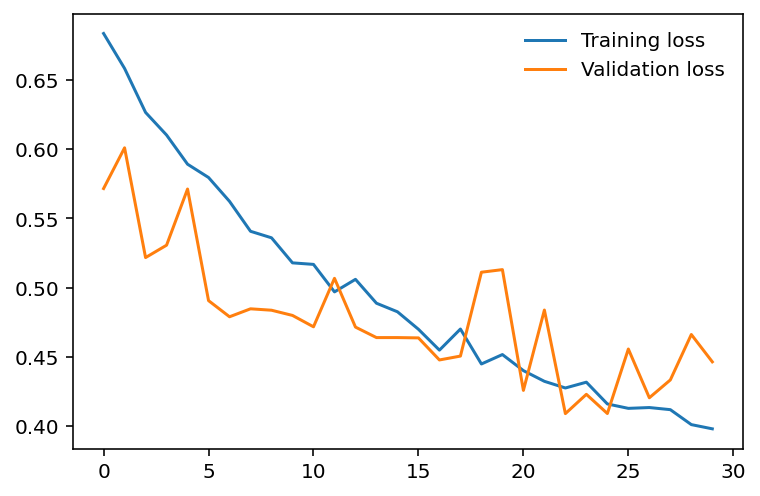

<All keys matched successfully>

In [82]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import datetime


# train the model
model_transfer, train_losses, valid_losses, time_spent = train(30, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
min_train_loss = float(min(train_losses))
min_valid_loss = float(min(valid_losses))
        
print("Minimum trainig loss: ", min_train_loss)
print("Minimum validation loss: ", min_valid_loss)

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
        
plt.legend(frameon=False)
plt.show()

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [83]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.426066


Test Accuracy: 87% (732/836)
